# Machine Learning and Statistics Project

### **Neil Anglim**
***

# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
iris = sns.load_dataset('iris')

---
# Introduction
---

This project embarks on an educational exploration into supervised learning and classification algorithms using the renowned Iris flower dataset associated with Ronald A Fisher. The primary goal is to comprehensively understand the fundamentals of supervised learning, delve into various classification algorithms, and implement them using the scikit-learn Python library.


---
# Project Brief
---

The objective of this notebook is to explore classification algorithms applied to the Iris flower dataset. It involves explaining the core concepts of supervised learning and classification algorithms, as well as the practical implementation of at least one common classification algorithm using scikit-learn. Throughout the notebook, emphasis will be placed on using appropriate plots, mathematical notations, and diagrams to explain the relevant concepts effectively.

---
# Introduction to Supervised Learning
---

## What is Supervised Learning?
Supervised learning is a branch of machine learning where algorithms learn from labeled training data. It involves training a model on input-output pairs, where the algorithm learns the mapping function from the input variables to the desired output variable (IBM, 2023). The primary goal of supervised learning is to predict the output for new, unseen data based on patterns learned from the labeled dataset.

## Principles of Supervised Learning:
- Labeled Training Data: Supervised learning algorithms require labeled training data, where each data point is associated with a known output or target variable (Gillis, 2021).
- Learning from Examples: Algorithms learn patterns and relationships between input features and their corresponding labels through examples provided in the training data.
- Generalization: The learned patterns should generalize well to unseen data to make accurate predictions or classifications.

## Importance of Labeled Data in Training:
Labeled data forms the foundation of supervised learning. The availability of high-quality labeled datasets is crucial for training accurate and reliable predictive models. Some key aspects include:
### Training the Model: 
- Labeled data serves as a guide for the model during the learning process. It helps the algorithm understand the relationship between inputs and outputs.
### Model Evaluation:
- Labeled data facilitates the evaluation of the model's performance. The model predictions can be compared against the true labels to assess accuracy and determine the model's effectiveness.
### Iterative Improvement:
- With access to labeled data, models can be continuously refined and improved through iterations, leading to better performance and generalization.
### Challenges:
- Acquiring high-quality labeled data can be challenging and costly in some domains. Noisy or incorrect labels might negatively impact model performance.

## Cross-Validation in Supervised Learning:
Cross-validation is a vital technique in supervised learning used to assess a model's performance and generalizability. It involves partitioning the available labeled data into multiple subsets or folds, training the model on a portion of the data, and using the remaining data for validation. The primary aim of cross-validation is to estimate how well the model would perform on unseen data.

### K-Fold Cross-Validation:
One common method is k-fold cross-validation, where the dataset is divided into k equal-sized folds. The model is trained k times, if a specific value for k is given then it may be used to reference the model, such as k=10 becoming 10-fold cross-validation (Brownlee, 2018).  This process rotates until each fold has been used for validation once. The performance metrics obtained from each iteration are then averaged to provide a more robust estimate of the model's performance.

### Benefits of Cross-Validation:
- Provides a more reliable estimate of the model's performance compared to a single train-test split.
- Helps in detecting overfitting or underfitting issues by assessing the model's performance across different subsets of the data.
- Maximizes the use of available data for both training and validation (Sharma, 2017).

### Application in Model Evaluation:
In the context of this project, employing cross-validation techniques will enable a more comprehensive assessment of classification algorithms' performance on predicting iris species. It allows for a better understanding of how well these algorithms generalize to new, unseen data points.

In the context of the Iris Dataset project, supervised learning techniques will be employed to classify the species of iris flowers based on their features. Exploring various classification algorithms will demonstrate how supervised learning is applied to this specific dataset.


---
# Understanding Classification Algorithms
---

## Introduction to Classification Algorithms

In supervised learning, classification algorithms assign categories or labels to data points based on their features. This section provides an introductory overview:

- **Definition of Classification:**
  - Classification involves categorizing data into distinct classes or groups based on their features.
  
- **Importance of Classification Algorithms:**
  - These algorithms are fundamental tools used in image recognition, spam detection, medical diagnosis, and various other applications.


## Types of Classification Algorithms

Classification algorithms adopt diverse approaches to identify patterns and make predictions. Here's an overview:

### 1. Linear Classifiers:
- **Logistic Regression:**
  - A linear model for binary classification using logistic/sigmoid functions.
  
- **Support Vector Machines (SVM):**
  - Identifies optimal hyperplanes or decision boundaries to separate data points of different classes in a high-dimensional space ([scikitlearn](https://scikit-learn.org/stable/modules/svm.html#)).


### 2. Non-linear Classifiers:
- **k-Nearest Neighbors (k-NN):**
  - Determines a data point's class based on the majority class of its k nearest neighbors.
  
- **Decision Trees:**
  - Uses hierarchical tree-like structures to split data based on feature thresholds.
  
- **Random Forests:**
  - Ensemble method utilizing multiple decision trees.

- **Support Vector Machines (SVM) with Kernels:**
  - Extends linear SVM using kernel functions for non-linear separation (from [scikitlearn](https://scikit-learn.org/stable/modules/svm.html#)).

### 3. Probabilistic Classifiers:
- **Naive Bayes:**
  - Based on Bayes' theorem, assumes feature independence for classification [scikitlearn(naive bayes)](https://scikit-learn.org/stable/modules/naive_bayes.html).

### 4. Ensemble Methods:
- **Bagging, Boosting, and Stacking:**
  - Techniques combining multiple classifiers for enhanced performance.

Each algorithm possesses specific strengths, weaknesses, and applicability to different datasets and tasks.

---
# Exploring the Iris Dataset
---

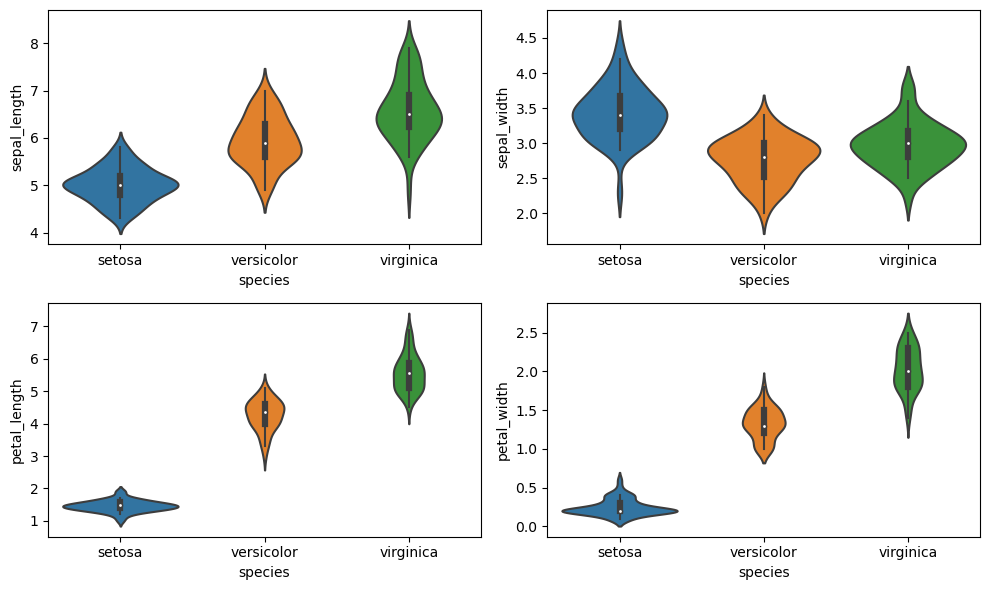

In [2]:
# Using seaborn to create violin plots for each feature across different species
plt.figure(figsize=(10, 6))

# violin plot for Sepal Length
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=iris)

# violin plot for Sepal Width
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=iris)

# violin plot for Petal Length
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=iris)

# violin plot for Petal Width
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=iris)

plt.tight_layout()

## Understanding Violin Plots

This was adapted using information from the blog post (Carron, 2021), and my own reading on the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Violin plots are a versatile data visualization tool that combines aspects of box plots and kernel density estimation (KDE) plots:

1. **Kernel Density Estimation (KDE):**
   - Represents the probability density of data along the y-axis using a smoothed curve, this is represented as the wider points in a violin plot. 
   - Wider sections indicate higher data density, showing where the data is more concentrated.

2. **Box Plot Elements:**
   - Median (white dot), interquartile range (IQR - thick black line), and whiskers for data range, excluding outliers.
   - Outliers are depicted as individual points beyond the whiskers.

## Interpretation:
- **Visualizing Distribution:**
  - Offers a clear view of data distribution, indicating central tendency, spread, and multimodal nature.

- **Comparison Between Groups:**
  - Enables easy comparison between different groups (e.g., species in the Iris dataset).
  - Differences in violin shapes imply variations in feature values among groups.

## Usefulness:
- **Comparing Multiple Distributions:**
  - Useful for simultaneous comparison of distributions or categories, aiding in understanding variability and differences across groups.

## Application to Iris Dataset:

In the context of the Iris dataset, violin plots help visualize and compare feature distributions (sepal length, sepal width, petal length, petal width) among different species (setosa, versicolor, virginica). They highlight variations in these features across Iris species, aiding in understanding their differences.

Violin plots offer a comprehensive visualization of data distributions, aiding in comparative analysis between groups and providing insights into the variability and spread of features across different categories.

---
# Introduction to Learning Algorithms (k-NN & SVM)
---

## k-Nearest Neighbors (k-NN)

The k-Nearest Neighbors algorithm, often referred to as k-NN or KNN, is a straightforward yet powerful classification algorithm used for both simple and complex tasks. Its principle is based on the idea that data points with similar points can be found near each other (IBM, n.d.).

The key concepts behind k-NN include:

- **Distance Metrics:** Euclidean distance is commonly used to measure the distance between data points in the feature space.

$
d(p, q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}
$

> It is also possible to use others distance formulas, such as Manhattan, Minkowski, or Hamming, which are detailed further [here](https://www.ibm.com/topics/knn#K-Nearest+Neighbors+Algorithm).


- **Majority Voting:** Classification of a new instance is determined by majority voting among its k-nearest neighbors.
- **Hyperparameter k:** The value of k determines the number of neighbors considered for classification.

k-NN is intuitive, doesn't require explicit model training, is easy to implement, and is particularly effective for smaller datasets.

## Support Vector Machines (SVM)

While SVMs (Support Vector Machines) are versatile and robust classifiers, they might be considered complex for certain tasks due to their potential for high-dimensional data representation (IBM, 2021) and their ability to learn complex decision boundaries. SVMs aim to find the hyperplane that best separates data points belonging to different classes, with a maximum margin between classes.

SVMs offer flexibility through the use of different kernels (linear, polynomial, radial basis function) for handling linearly inseparable data in higher dimensions.

---
# Implementation of the chosen algorithm using scikit-learn
---

In this project, the focus will primarily be on the implementation and exploration of the k-Nearest Neighbors algorithm using the scikit-learn library. This choice is based on its simplicity, interpretability, and suitability for the Iris dataset, where data points are relatively small and distinct classes are well-separated.

The subsequent sections will delve deeper into the practical implementation of k-NN on the Iris dataset, covering steps such as data preprocessing, hyperparameter tuning, and performance evaluation.

## Data Preprocessing

- Splitting the data into features `x` and the target variable `y`
- Splitting the data into training and test sets

In [3]:
x = iris.drop('species', axis=1) # features
y = iris['species'] # target variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Instantiate and train the kNN classifier

- Creating an instance of the k-NN classifier (KNeighborsClassifier) and defining the number of neighbors (n_neighbors) to consider during classification.
- Training the classifier using the training data (X_train and y_train) via the fit() method.

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)  # hyperparameter k=3

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predict and Evaluate the model

- Using the trained k-NN model to make predictions on the test dataset `(X_test)`.
- Calculating the accuracy of the model's predictions compared to the actual observed values using `accuracy_score`.
- Displaying a classification report, which includes metrics like precision, recall, and F1-score, to assess the model's performance for each class.
- Visualizing the model's performance using a confusion matrix to show the number of correct and incorrect predictions.

In [5]:
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))

Accuracy: 0.933
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.89      0.89      0.89         9
   virginica       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



### Precision
- This is the ratio of correctly predicted observations to the total predicted observations, it indicates the accuracy of the positive predictions. Here it is in depth on [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

### Recall
- [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) is the ratio of correctly predicted positive observations to the total observed positive observations. It measures the model's ability to identify all positive instances.

### F1-score
- The mean of the precision and recall, computed like so `F1 = 2 * (precision * recall) / (precision + recall)`. A score of 1 indicates a perfect balance between precision and recall for that species.

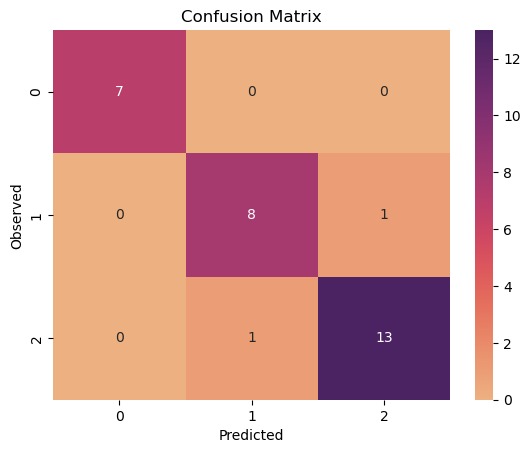

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="flare")
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Confusion Matrix')
plt.show()

---
# Conclusion
---

---
# References
---

***
# End